# Dataset exploration

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from folium import plugins
from folium.plugins import HeatMap
import folium

###  Index
1. The Traffic data set
2. Data cleaning
3. Data exploration (country level)
4. Data manipulation
5. Data exploration (municipality level)

## 1. The Traffic data set

https://www.opendata.dk/vejdirektoratet/stojdata-mastra

http://noegletal.dk/noegletal/

| Variable name | Description |
|---------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| DATAEJER | The owner of the traffic key figures - is displayed as the municipality number. The Road Directorate stands as data owner 0. |
| VEJBESTYRER | The road manager at the counting point - appears as a municipality number. The Road Directorate stands as road manager 0. |
| VEJNR | The administrative road number as stated in CVF (The Central Road and Path List, see cvf.dk) |
| VEJDEL | The road section of the counting point, in some municipalities also referred to as the Side Road Number. Is generally '0', or starts with '0', for regular road. |
| VEJNAVN | The name of the road at the counting point. |
| KILOMETER | The mileage indication - the counting point has a so-called mileage (stationing), which is typically the distance from the start of the road to the counting point; The mileage is then the mileage part of the mileage. |
| METER | As above, it is just a meter part of the mileage. |
| LOKATION | Description of the counting location |
| KOMMUNE | The municipality number at the counting point |
| KOERETOEJSART | Vehicle type, either Motor Vehicles (MOTORCTJ) or Bicycle moped (C / K) |
| AAR | The year in which the count, or counts, were performed. |
| AADT | Listed figures for annual traffic. Average number of vehicles per 24hour, taken over all days of the year. |
| HDT | Listed figures for Everyday Day traffic. Average number of vehicles per 24hour taken over all weekdays of the year. Weekends, summer vacation period and holidays are not included |
| JDT | Enumerated figures for July-Day traffic - traffic on a day in July |
| TRAFIKTYPE | The type of traffic, which says something about the distribution of traffic over the year. |
| GNS_HASTIGHED | The average measured speed of the counting point. |
| TALTE_DAGE | Number of days counted within the year. |
| AE10HOEJ | Equivalent 10-ton axes, usually referred to as Æ10 - a measure of the load of the road's bearing layer, calculated here for roads outside a designated urban area |
| AE10LAV | Like AE10HOEJ, but in a decidedly urban area. |
| LBIL_AADT | Truck EIGHT - EIGHT for trucks, here defined as vehicles with a total length of more than 5.80 meters. |
| HAST_GRAENSE | The speed limit applicable at the counting point. |
| FRAKTIL_PCT_15 | ! 5% speed quantile - the speed at which 15% of vehicles drive. |
| FRAKTIL_PCT_85 | 85% speed quantile - the speed at which 85% of vehicles drive. |
| PCT_OVER_HASTGR | Percentage of vehicles traveling above the speed limit, ie "too fast". |
| PCT_OVER_HASTGR_P10 | Percentage of vehicles traveling above the speed limit + 10km / h - if the speed limit is 60km/h, that is the percentage of vehicles that drive above 70km/h. |
| PCT_OVER_HASTGR_P20 | Percentage of vehicles traveling above the speed limit + 20km / h - if the speed limit is 60km/h, that is the percentage of vehicles that drive above 80km/h. |
| LBIL_PCT | The percentage of trucks taken in relation to the total amount of motor vehicles. Trucks here are vehicles with a total length of more than 5.80 meters. |

In [7]:
url = 'https://raw.githubusercontent.com/IncioMan/socialdata/master/Final%20Project/dataset/trafficdata_withlonlat_ver2.csv'
traffic_data = pd.read_csv(url, error_bad_lines=False)
traffic_data.Latitude = traffic_data.Latitude.str.replace(";", "")
traffic_data.head()

,FID,Dataowner,RoadManager,RoadId,RoadPartId,RoadName,Kilometer,Meter,Location,Municipality,...,SpeedLimit,Quantile15,Quantile85,PctOverSpeedLimit,PctOverSpeedLimit10,PctOverSpeedLimit20,PctOfTrucks,Coordinates,Longitude,Latitude
0,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,751,751.0,7511252,0,Christian X´s Vej,0.0,540.0,Ml. Ellehammervej og Marconivej,751.0,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (573014.0000013472 6221529.999744055),10.174776,56.133225937782534
1,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851.0,8515246,0,Marathonvej,0.0,180.0,Fabriksparken / Hobrovej,851.0,...,50.0,34.8,53.9,27.1,3.7,0.4,3.3,POINT (551965.0000006577 6315761.999742397),9.855032,56.982481704333544
2,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851.0,8516178,0,Offenbachsvej,0.0,222.0,Mozartsvej / Telemannsvænget,851.0,...,50.0,27.1,42.3,1.4,0.1,0.0,1.7,POINT (549415.0000006119 6318575.999742349),9.813631,57.008038318905875
3,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
traffic_data.shape

(26917, 31)

In [4]:
#Check that he FID variable is unique for each observation
traffic_data.FID.unique().size

26917

In [5]:
traffic_data.dtypes

FID                             object
Dataowner                       object
RoadManager                    float64
RoadId                          object
RoadPartId                      object
RoadName                        object
Kilometer                      float64
Meter                          float64
Location                        object
Municipality                   float64
TypeOfVehicle                   object
Year                           float64
AverageDailyVehicles           float64
AverageWeekdayDailyVehicles    float64
DailyJulyTraffic               float64
Traffictype                     object
AverageSpeed                   float64
CountedDays                    float64
AE10High                       float64
AE10Low                        float64
AverageDailyTrucks             float64
SpeedLimit                      object
Quantile15                     float64
Quantile85                      object
PctOverSpeedLimit              float64
PctOverSpeedLimit10      

In [6]:
#Transforming object variables into float
traffic_data['Quantile85']= pd.to_numeric(traffic_data['Quantile85'], errors='coerce')

## 2. Data cleaning

### 2A. Addressing missing values

In [120]:
traffic_data.isna().sum()

FID                                0
Dataowner                       3082
RoadManager                     3082
RoadId                          3082
RoadPartId                      3082
RoadName                        3082
Kilometer                       3082
Meter                           3082
Location                        3093
Municipality                    3082
TypeOfVehicle                   3082
Year                            3082
AverageDailyVehicles            3083
AverageWeekdayDailyVehicles     3108
DailyJulyTraffic                3082
Traffictype                     3082
AverageSpeed                    6615
CountedDays                     3082
AE10High                        9374
AE10Low                        11833
AverageDailyTrucks              9374
SpeedLimit                      5321
Quantile15                      8142
Quantile85                      8142
PctOverSpeedLimit               8254
PctOverSpeedLimit10             8254
PctOverSpeedLimit20             8254
P

Remove Municipality-rows that contain only NaN-values.

In [121]:
traffic_data = traffic_data.dropna(subset=['Municipality']).reset_index(drop=True)
traffic_data.isna().sum()

FID                               0
Dataowner                         0
RoadManager                       0
RoadId                            0
RoadPartId                        0
RoadName                          0
Kilometer                         0
Meter                             0
Location                         11
Municipality                      0
TypeOfVehicle                     0
Year                              0
AverageDailyVehicles              1
AverageWeekdayDailyVehicles      26
DailyJulyTraffic                  0
Traffictype                       0
AverageSpeed                   3533
CountedDays                       0
AE10High                       6292
AE10Low                        8751
AverageDailyTrucks             6292
SpeedLimit                     2239
Quantile15                     5060
Quantile85                     5060
PctOverSpeedLimit              5172
PctOverSpeedLimit10            5172
PctOverSpeedLimit20            5172
PctOfTrucks                 

In [122]:
len(traffic_data)

23835

Lots of rows had shared NaNs, as there is an overall NaN-reduction when only selecting on the Muncipality column. However, there are still NaN values present in the data. We choose to remove the AE10-variables as these are not interesting for this project. Additionally the rows containing nan-values for the remaining variables are removed from the data set.

In [123]:
traffic_data = traffic_data.drop(columns=["AE10Low", "AE10High"])
traffic_data = traffic_data.dropna().reset_index(drop=True)

In [124]:
len(traffic_data)

16220

### 2B. Addressing outliers and errors

#### Municipality variable
There should be max 98 Danish Municipalities. However, there are 99. We make sure to remove the observations that have an unexsisting municipality code.

(http://www.maerkdinbygning.dk/materiale/files/materiale-konsulenter/energimarkning/1507-nyeoggamlekommunenumre.pdf)

In [125]:
#Check the Municipality variable
traffic_data.Municipality.unique().size

99

In [126]:
kommune_code = [101,147,151,153,155,157,159,161,163,165,167,169,173,175,183,185,187,190,201,210,217,219,223,230,240,250,253,259,260,265,269,270,306,316,320,326,329,330,336,340,350,360,370,376,390,400,410,420,430,440,450,461,479,480,482,492,510,530,540,550,561,563,573,575,580,607,615,621,630,657,661,665,671,706,707,710,727,730,740,741,746,751,756,760,766,773,779,787,791,810,813,820,825,840,846,849,851,860]
kommune_name = ["København","Frederiksberg","Ballerup","Brøndby","Dragør","Gentofte","Gladsaxe","Glostrup","Herlev","Albertslund","Hvidovre","Høje-Taastrup","Lyngby-Taarbæk","Rødovre","Ishøj","Tårnby","Vallensbæk","Furesø","Allerød","Fredensborg","Helsingør","Hillerød","Hørsholm","Rudersdal","Egedal","Frederikssund","Greve","Køge","Halsnæs","Roskilde","Solrød","Gribskov","Odsherred","Holbæk","Faxe","Kalundborg","Ringsted","Slagelse","Stevns","Sorø","Lejre","Lolland","Næstved","Guldborgsund","Vordingborg","Bornholm","Middelfart","Assens","Faaborg-Midtfyn","Kerteminde","Nyborg","Odense","Svendborg","Nordfyns","Langeland","Ærø","Haderslev","Billund","Sønderborg","Tønder","Esbjerg","Fanø","Varde","Vejen","Aabenraa","Fredericia","Horsens","Kolding","Vejle","Herning","Holstebro","Lemvig","Struer","Syddjurs","Norddjurs","Favrskov","Odder","Randers","Silkeborg","Samsø","Skanderborg","Aarhus","Ikast-Brande","Ringkøbing-Skjern","Hedensted","Morsø","Skive","Thisted","Viborg","Brønderslev","Frederikshavn","Vesthimmerlands","Læsø","Rebild","Mariagerfjord","Jammerbugt","Aalborg","Hjørring"]

kommune_dictionary = dict(zip(kommune_name, kommune_code))
inverse_dictionary = dict(zip(kommune_code, kommune_name))

{101: 'København',
 147: 'Frederiksberg',
 151: 'Ballerup',
 153: 'Brøndby',
 155: 'Dragør',
 157: 'Gentofte',
 159: 'Gladsaxe',
 161: 'Glostrup',
 163: 'Herlev',
 165: 'Albertslund',
 167: 'Hvidovre',
 169: 'Høje-Taastrup',
 173: 'Lyngby-Taarbæk',
 175: 'Rødovre',
 183: 'Ishøj',
 185: 'Tårnby',
 187: 'Vallensbæk',
 190: 'Furesø',
 201: 'Allerød',
 210: 'Fredensborg',
 217: 'Helsingør',
 219: 'Hillerød',
 223: 'Hørsholm',
 230: 'Rudersdal',
 240: 'Egedal',
 250: 'Frederikssund',
 253: 'Greve',
 259: 'Køge',
 260: 'Halsnæs',
 265: 'Roskilde',
 269: 'Solrød',
 270: 'Gribskov',
 306: 'Odsherred',
 316: 'Holbæk',
 320: 'Faxe',
 326: 'Kalundborg',
 329: 'Ringsted',
 330: 'Slagelse',
 336: 'Stevns',
 340: 'Sorø',
 350: 'Lejre',
 360: 'Lolland',
 370: 'Næstved',
 376: 'Guldborgsund',
 390: 'Vordingborg',
 400: 'Bornholm',
 410: 'Middelfart',
 420: 'Assens',
 430: 'Faaborg-Midtfyn',
 440: 'Kerteminde',
 450: 'Nyborg',
 461: 'Odense',
 479: 'Svendborg',
 480: 'Nordfyns',
 482: 'Langeland',
 492

In [127]:
#Counting the wrong municipalities observations
wrong_municipality_code = traffic_data[~traffic_data.Municipality.isin(kommune_dictionary.values())]
len(wrong_municipality_code)

64

In [129]:
#Remove observations with unexisting kommune code
traffic_data = traffic_data[traffic_data.Municipality.isin(kommune_dictionary.values())]

#### Removing Municipalities with few observations

In [138]:
# Adding the MunicipalityName variable
traffic_data['MunicipalityName'] = traffic_data.Municipality.map(inverse_dictionary)

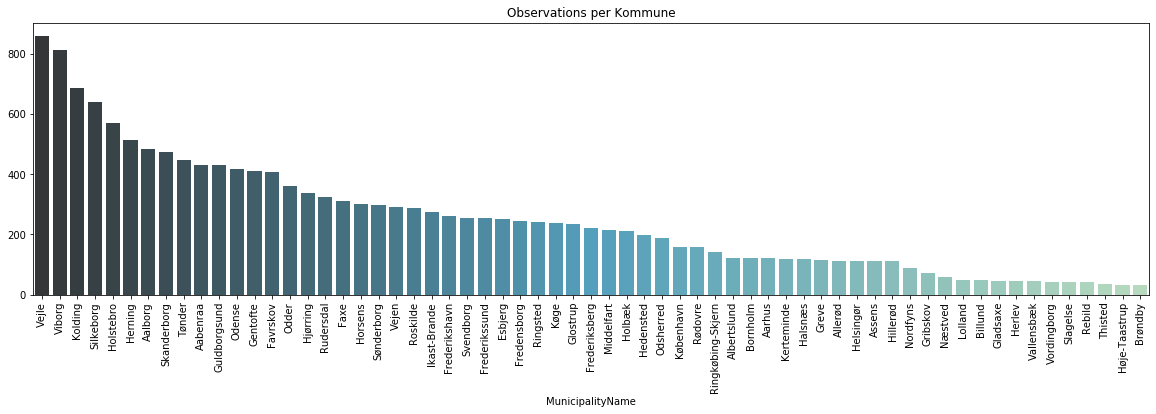

In [143]:
#Plotting the number of observations per Municipality
plt.figure(figsize=(20,5))
plt.title("Observations per Municipality")
df = traffic_data.groupby('MunicipalityName').FID.count().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order=df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

In [140]:
#Removing the municipalities that have less then 30 observations
obsmunicipalities = traffic_data.groupby('MunicipalityName').FID.count().sort_values(ascending = False)
selectedmunicipalities = list(obsmunicipalities[obsmunicipalities>30].index)
traffic_data = traffic_data[traffic_data.MunicipalityName.isin(selectedmunicipalities)]

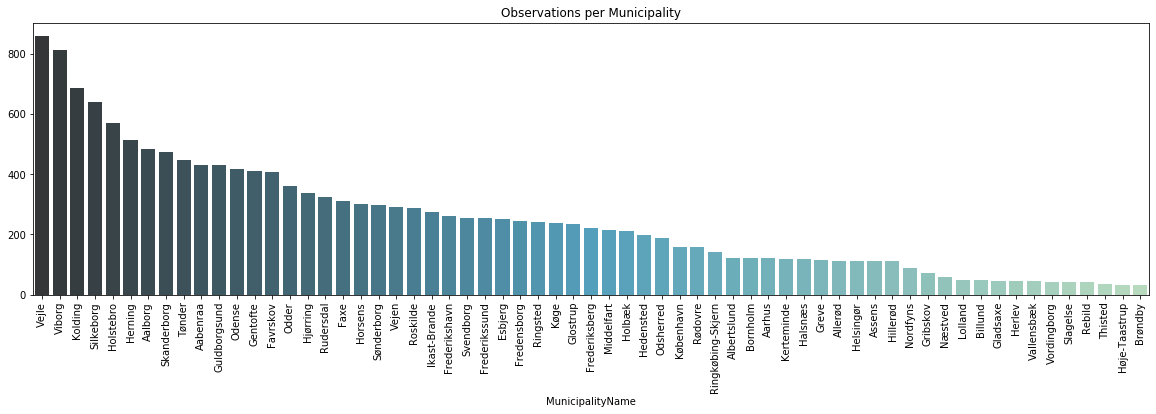

In [152]:
#Plotting the number of observations per Selected municipalities
plt.figure(figsize=(20,5))
plt.title("Observations per Municipality")
df = traffic_data.groupby('MunicipalityName').FID.count().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order=df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

#### Other variables
We then explore the other variables, by displaying the  summary statistics and investigating potential erros.

In [130]:
traffic_data.describe()

,RoadManager,Kilometer,Meter,Municipality,Year,AverageDailyVehicles,AverageWeekdayDailyVehicles,DailyJulyTraffic,AverageSpeed,CountedDays,AverageDailyTrucks,Quantile15,PctOverSpeedLimit,PctOverSpeedLimit10,PctOverSpeedLimit20,PctOfTrucks,Longitude
count,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000,16156.000000
mean,455.022654,9.966823,381.710201,525.229450,2016.749195,4073.601820,4503.615251,3858.124350,51.572097,17.704778,361.237435,41.476628,25.792282,8.003138,2.316118,7.732650,10.457438
std,276.395103,32.668194,282.581620,222.409414,2.812557,9220.254681,10112.419144,9221.059651,19.924356,27.805462,1113.514025,18.240351,25.473472,12.230383,5.560386,5.854151,1.370429
min,0.000000,0.000000,0.000000,101.000000,2000.000000,0.000000,0.000000,0.000000,8.200000,1.300000,-74.000000,6.600000,0.000000,-7.700000,-17.200000,-3.100000,8.114568
25%,217.000000,0.000000,140.000000,320.000000,2015.000000,494.000000,545.750000,431.000000,37.600000,7.000000,27.000000,27.900000,2.500000,0.300000,0.100000,3.900000,9.438562
50%,550.000000,0.000000,319.000000,580.000000,2017.000000,1433.000000,1591.000000,1269.000000,48.300000,7.900000,88.000000,39.500000,18.000000,2.800000,0.500000,6.800000,9.959723
75%,710.000000,3.000000,600.000000,727.000000,2019.000000,4100.750000,4554.250000,3685.750000,62.400000,11.000000,285.000000,50.500000,44.100000,10.800000,2.200000,10.000000,11.953815
max,860.000000,342.000000,3300.000000,860.000000,2020.000000,134915.000000,144973.000000,138913.000000,120.500000,365.800000,29273.000000,102.400000,99.500000,98.200000,93.400000,115.900000,15.149853


Below are some key takeaways from the summary statistics, which may be cause for furhter investigation.
* **Kilometer:** The maximum distance is 645, indicating that there is a measuring station 645 kilometers from the start of the road. This number is very high as roads in Denmark are not this long.
* **AverageDailyVehicles:** The minimum-value observation for the Average Daily Vehicles is negative, which should not be possible. The same is the case for **AverageWeekdayDailyVehicles**, **DailyJulyTraffic**, **PctOverSpeedLimit**, **PctOverSpeedLimit10**, **PctOverSpeedLimit20**, **PctOfTrucks**.
* **PctOfTrucks:** The maximum value for the Percantage of trucks on a road exceeds 100 % which should not be possible.
* **AverageWeekdayDailyVehicles:** Some maximum values for the daily number of vehicles are very high, but when compared to statistics from https://www.vejdirektoratet.dk/side/trafikkens-udvikling-i-tal, it is in accordance with the most populated roads in Denmark (Køge Bugt Motorvejen, Motorring 3)

Let's have a deeper look into some of these suspicious measurements. Let's look at the 645 km long road.

In [131]:
traffic_data[traffic_data["Kilometer"] == traffic_data["Kilometer"].max()]

,FID,Dataowner,RoadManager,RoadId,RoadPartId,RoadName,Kilometer,Meter,Location,Municipality,...,SpeedLimit,Quantile15,Quantile85,PctOverSpeedLimit,PctOverSpeedLimit10,PctOverSpeedLimit20,PctOfTrucks,Coordinates,Longitude,Latitude
15339,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153cf...,0,0.0,80,12,Frederikshavnmotorvejen,342.0,270.0,Sideanlæg: Øksenhede Vest,813.0,...,130.0,42.0,84.4,0.6,-2.5,-5.7,10.3,POINT (587721.0000033564 6357194.99974163),10.457762,57.34916415365037


A quick google search indicates that Frederikshavnmotorvejen is indeed not 645 kilometers. The longest road in Denmark is 310 kilometers, and it is the E45 high-speed road. (Ref: https://da.wikipedia.org/wiki/Motorveje_i_Danmark). Let's see how many roads exceed this number in the data set.

In [132]:
print("Amount of measurements stations placed more than 310 kilometers away from start of road: {}".format(sum(traffic_data["Kilometer"] > 310)))

Amount of measurements stations placed more than 310 kilometers away from start of road: 14


It is hard to say if these roads are faulty measurements as the documentation for the Kilometer variable reads : The mileage indication - the counting point has a so-called mileage (stationing), which is _typically_ the distance from the start of the road to the counting point; The mileage is then the mileage part of the mileage.
We therefore choose not to keep observations with high values for Kilometer in further analysis.

Below are counts for negative observations for columns which shouldn't contain negative values. The counts for observations exceeing 100 % in **PctOfTrucks** are also shown.

In [133]:
print("Amount of negative observations in AverageDailyVehicles columns: {}".format(sum(traffic_data["AverageDailyVehicles"] < 0)))
print("Amount of negative observations in AverageWeekdayDailyVehicles columns: {}".format(sum(traffic_data["AverageWeekdayDailyVehicles"] < 0)))
print("Amount of negative observations in DailyJulyTraffic columns: {}".format(sum(traffic_data["DailyJulyTraffic"] < 0)))
print("Amount of negative observations in AverageDailyTrucks columns: {}".format(sum(traffic_data["AverageDailyTrucks"] < 0)))
print("Amount of negative observations in PctOverSpeedLimit10 columns: {}".format(sum(traffic_data["PctOverSpeedLimit10"] < 0)))
print("Amount of negative observations in PctOverSpeedLimit20 columns: {}".format(sum(traffic_data["PctOverSpeedLimit20"] < 0)))
print("Amount of negative observations in PctOfTrucks columns: {}".format(sum(traffic_data["PctOfTrucks"] < 0)))
print("Amount of observations exceeding 100 % PctOfTrucks columns: {}".format(sum(traffic_data["PctOfTrucks"] > 100)))

Amount of negative observations in AverageDailyVehicles columns: 0
Amount of negative observations in AverageWeekdayDailyVehicles columns: 0
Amount of negative observations in DailyJulyTraffic columns: 0
Amount of negative observations in AverageDailyTrucks columns: 1
Amount of negative observations in PctOverSpeedLimit10 columns: 22
Amount of negative observations in PctOverSpeedLimit20 columns: 32
Amount of negative observations in PctOfTrucks columns: 1
Amount of observations exceeding 100 % PctOfTrucks columns: 1


The majority of observations are positive, with only a few negative ones. The observations are replaced with NaN values.

In [134]:
num = traffic_data._get_numeric_data()
num
num[num < 0] = np.nan
if traffic_data.PctOfTrucks.max() > 100:
    traffic_data.PctOfTrucks.replace([traffic_data.PctOfTrucks.max()], np.nan, inplace = True)

#### Number of observations per Year

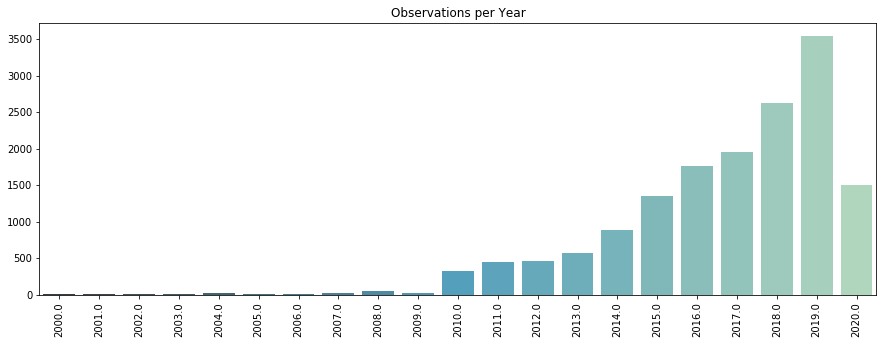

In [153]:
plt.figure(figsize=(15,5))
plt.title("Observations per Year")
df = traffic_data.Year.value_counts()
ax = sns.barplot(df.keys(), df.values, order=df.keys().sort_values(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

In [ ]:
#MOVIE + Remove observation before 2010?

## 3. Data manipulation

...we create new variables...

In [145]:
traffic_data = traffic_data.dropna(subset=['SpeedLimit', 'AverageSpeed'])
traffic_data = traffic_data.astype({'SpeedLimit': 'float64'})

In [146]:
traffic_data["AverageDifferenceSpeedLimitAvgSpeed"] =  traffic_data.SpeedLimit - traffic_data.AverageSpeed

In [147]:
traffic_data["JulyWeekdaysRatio"] = traffic_data.DailyJulyTraffic / traffic_data.AverageWeekdayDailyVehicles

## 4. Summary statistics and variable distributions

In [8]:
#BOXPLOT instead?
traffic_data.describe()

,RoadManager,Kilometer,Meter,Municipality,Year,AverageDailyVehicles,AverageWeekdayDailyVehicles,DailyJulyTraffic,AverageSpeed,CountedDays,AE10High,AE10Low,AverageDailyTrucks,Quantile15,PctOverSpeedLimit,PctOverSpeedLimit10,PctOverSpeedLimit20,PctOfTrucks,Longitude
count,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23834.000000,23809.000000,23835.000000,20302.000000,23835.000000,17543.000000,15084.000000,17543.000000,18775.000000,18663.000000,18663.000000,18663.000000,17528.000000,23834.000000
mean,454.053535,11.220390,380.595343,529.148676,2016.506650,3615.603298,3999.301525,3433.815649,47.224569,18.600445,408.581599,64.097149,362.561780,39.441715,23.288282,7.290977,2.151610,7.727071,10.441854
std,280.212598,75.848759,293.183152,224.075113,9.797342,8851.874588,9726.566289,8784.297343,21.297533,32.247161,1704.043324,175.487237,1109.899104,18.874681,25.344030,11.926588,5.414962,5.901951,1.348268
min,0.000000,0.000000,0.000000,0.000000,572.000000,-24.000000,-25.000000,-20.000000,0.000000,0.200000,0.000000,0.000000,-74.000000,3.400000,0.000000,-7.700000,-17.200000,-3.100000,8.114568
25%,210.000000,0.000000,131.000000,320.000000,2015.000000,213.000000,234.000000,200.000000,31.100000,7.100000,13.000000,6.000000,26.000000,25.000000,0.900000,0.100000,0.000000,3.900000,9.453965
50%,550.000000,0.000000,320.000000,580.000000,2017.000000,962.000000,1074.000000,862.000000,45.000000,8.000000,50.000000,20.000000,88.000000,37.400000,13.300000,2.000000,0.400000,6.800000,9.967369
75%,710.000000,4.000000,600.000000,740.000000,2019.000000,3474.750000,3883.000000,3119.500000,59.000000,11.900000,185.000000,63.000000,288.000000,48.600000,40.700000,9.600000,2.000000,10.000000,11.937373
max,860.000000,10392.000000,8700.000000,990.000000,2020.000000,134915.000000,144973.000000,138913.000000,120.500000,365.800000,33839.000000,6750.000000,29273.000000,102.400000,100.000000,99.900000,93.400000,115.900000,15.149853


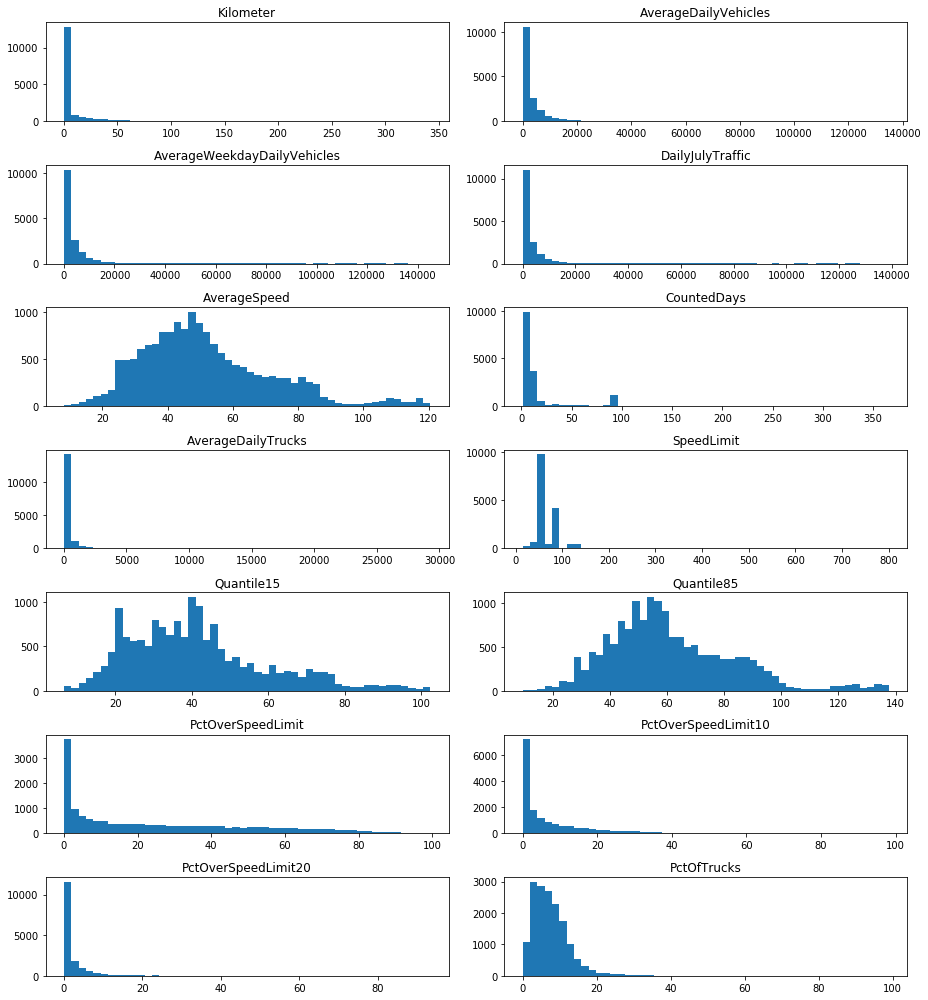

In [135]:
cols_to_plot = ['Kilometer', 'AverageDailyVehicles',
       'AverageWeekdayDailyVehicles', 'DailyJulyTraffic',
       'AverageSpeed', 'CountedDays',
       'AverageDailyTrucks', 'SpeedLimit', 'Quantile15', 'Quantile85',
       'PctOverSpeedLimit', 'PctOverSpeedLimit10', 'PctOverSpeedLimit20',
       'PctOfTrucks'] #ADD NEW VARIABLES

fig = plt.figure(figsize=(13,14))
for i in range(len(cols_to_plot)):
    fig.add_subplot(7, 2, i+1)
    plt.hist(pd.to_numeric(traffic_data[cols_to_plot[i]]), bins = 50)
    plt.title(cols_to_plot[i])
    plt.tight_layout()
    
plt.show()

Many of the variables have tendencies to have long tails to the right, which indicate that there are some few high valued observations for many of them. Despite these being outliers compared to the rest of the data, the values are still seen as realistic, and therefore kept in the data set for further analysis.

## 5. Data Exploration

### 5A. Temporal trends

In [230]:
vars_to_plot = ['AverageDailyVehicles', 'AverageSpeed', 'AverageDailyTrucks', 
                'PctOverSpeedLimit', 'PctOverSpeedLimit10', 'PctOverSpeedLimit20']

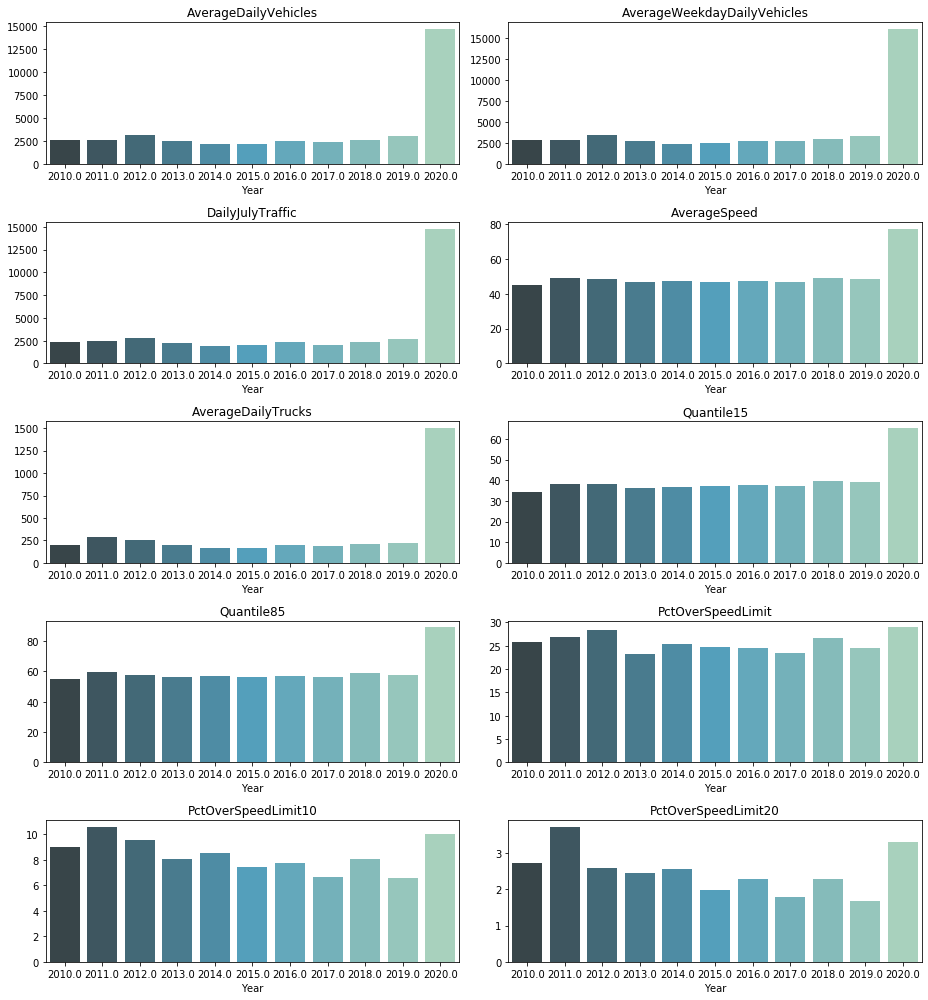

In [231]:
fig = plt.figure(figsize=(13,14))
for i in range(len(cols_to_plot)):
    fig.add_subplot(5, 2, i+1)
    df = traffic_data[traffic_data.Year > 2009].groupby('Year')[vars_to_plot[i]].mean().sort_values(ascending = False)
    sns.barplot(df.keys(), df.values, palette="GnBu_d")
    plt.title(cols_to_plot[i])
    plt.tight_layout()
    
plt.show()

The `AverageDailyVehicles` and the `AverageSpeed` variables take relatively stable values throughout the years, but register a peak in 2020.
Therefore, in the cells below, we will check if this is due to data errors (i.e. irreasonably high numbers recorded in 2020) or if the entire distribution in 2020 is shifted towards higher values and the average reflects that distribution.

#### Average Speed

In [265]:
#Checking the maximum average speed recorded in the last 4 years
for i in [2017,2018,2019,2020]:
    print("Maximum average speed registered in {}: {}".format(i,traffic_data[traffic_data.Year == i].AverageSpeed.max()))

Maximum average speed registered in 2017: 90.4
Maximum average speed registered in 2018: 114.3
Maximum average speed registered in 2019: 115.9
Maximum average speed registered in 2020: 120.5


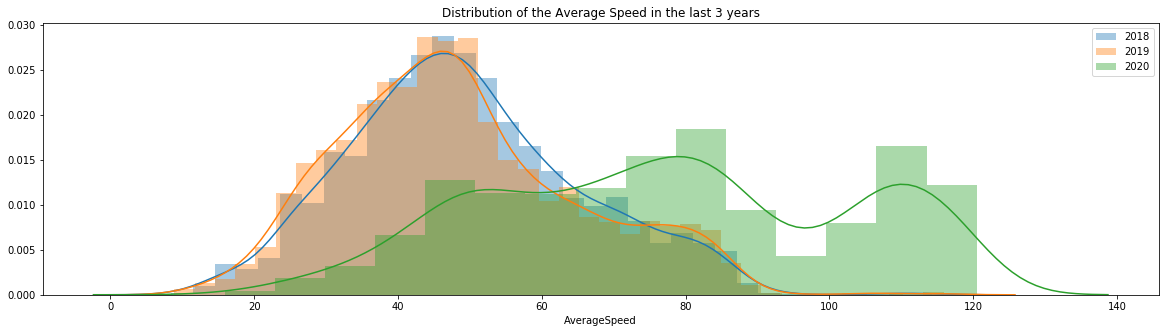

In [279]:
#Plotting the distribution of the average speed in the last 3 years
plt.figure(figsize=(20,5))
for i in [2018,2019,2020]:
    sns.distplot(traffic_data[traffic_data.Year == i]["AverageSpeed"], label= i)
    plt.title("Distribution of the Average Speed in the last 3 years")
    plt.legend()

#### Number of Vehicles

In [278]:
#Checking the maximum number of vehicles recorded in the last 4 years
for i in [2017,2018,2019,2020]:
    print("Maximum numbers of vehicles registered in {}: {}".format(i,traffic_data[traffic_data.Year == i].AverageDailyVehicles.max()))

Maximum numbers of vehicles registered in 2017: 33729.0
Maximum numbers of vehicles registered in 2018: 101195.0
Maximum numbers of vehicles registered in 2019: 116145.0
Maximum numbers of vehicles registered in 2020: 134915.0


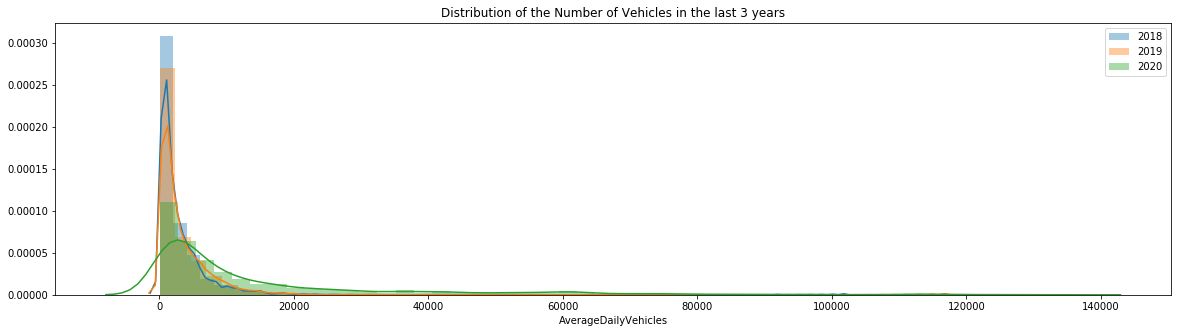

In [281]:
#Plotting the distribution of the average number of daily vehicles in the last 3 years
plt.figure(figsize=(20,5))
for i in [2018,2019,2020]:
    sns.distplot(traffic_data[traffic_data.Year == i]["AverageDailyVehicles"], label= i)
    plt.title("Distribution of the Number of Vehicles in the last 3 years")
    plt.legend()

As it can be seen, both for the `AverageDailyVehicles` and the `AverageSpeed` variables, the peaks in 2020 does not seem to be due to irreasonably high values. Instead, the peak might be due to different types of streets being measured. Indeed, for instance, if more measurements in 2020 were performed in highways, the resulting average speed and number of vehicles would be higher. 

We can verify this hypothesis by comparing the `SpeedLimit` variable throughout the years, which gives us an indication about the types of roads where the measurements have been performed.

#### Speed Limit

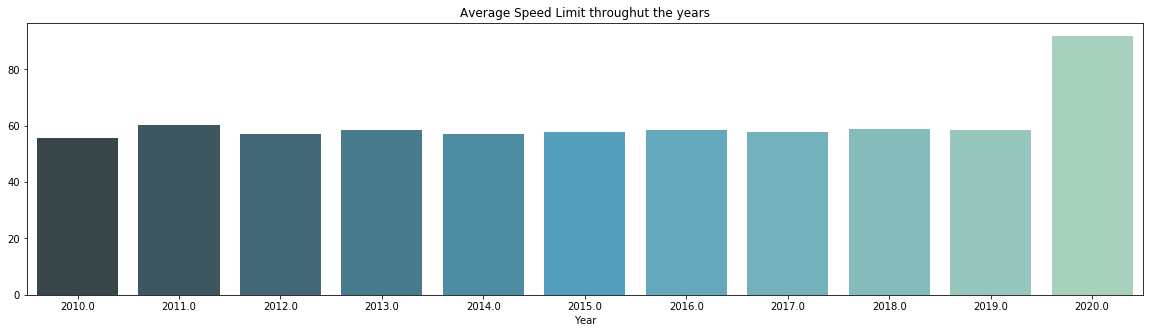

In [287]:
plt.figure(figsize=(20,5))
plt.title("Average Speed Limit throughut the years")
df = traffic_data[traffic_data.Year > 2009].groupby('Year')['SpeedLimit'].mean().sort_values(ascending = False)
sns.barplot(df.keys(), df.values, palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

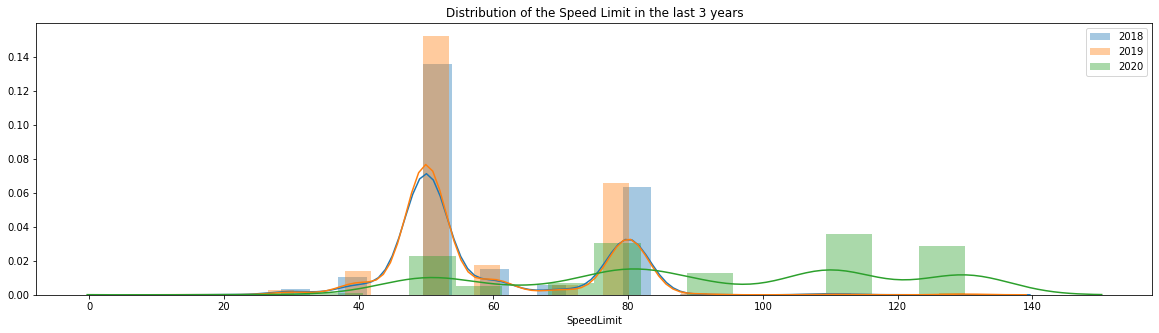

In [286]:
#Plotting the distribution of the speed limit in the last 3 years
plt.figure(figsize=(20,5))
for i in [2018,2019,2020]:
    sns.distplot(traffic_data[traffic_data.Year == i]["SpeedLimit"], label= i)
    plt.title("Distribution of the Speed Limit in the last 3 years")
    plt.legend()

While in the previous years the measurements have been performed in roads that have a speed lower than 80km/h, in 2020 a substantial fraction of measurements has been performed in high-speed roads. Therefore, the main increase of speed limit is driven by a different sample of roads.

To confirm that, we plot the `AverageSpeed` throughout the years, by only considering urban roads (`SpeedLimit` lower than 50km/h). 

C:\Users\alpt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


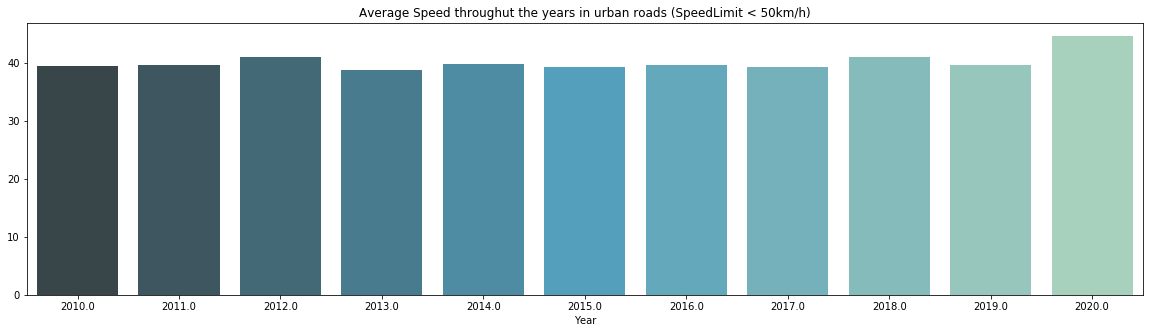

In [299]:
# REPLACE THIS ONE WITH the 6 plots (urban roads)
plt.figure(figsize=(20,5))
plt.title("Average Speed throughut the years in urban roads (SpeedLimit < 50km/h)")
df = traffic_data[traffic_data.Year > 2009][traffic_data.SpeedLimit<51].groupby('Year')['AverageSpeed'].mean().sort_values(ascending = False)
sns.barplot(df.keys(), df.values, palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

### 5.B Types of roads

### 5.C Correlations

### 5D. Comparison among all municipalities

#### Number of cars in 24h 

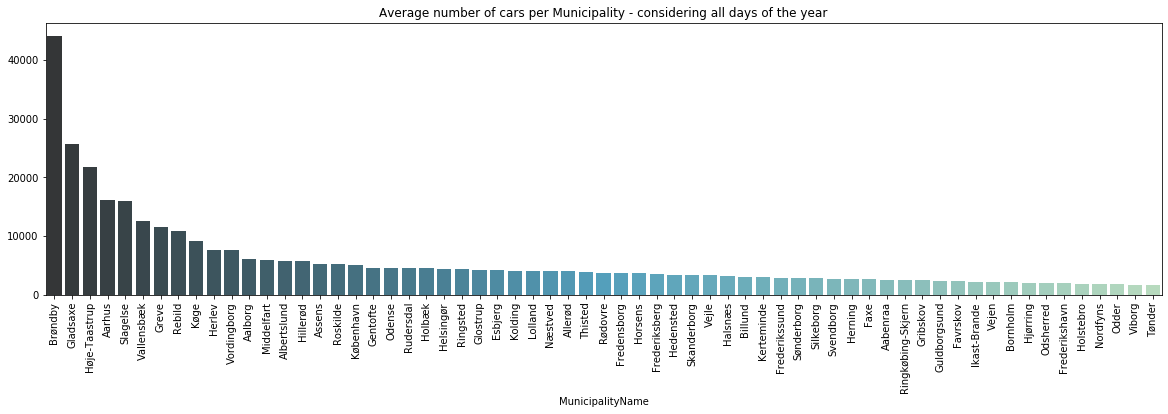

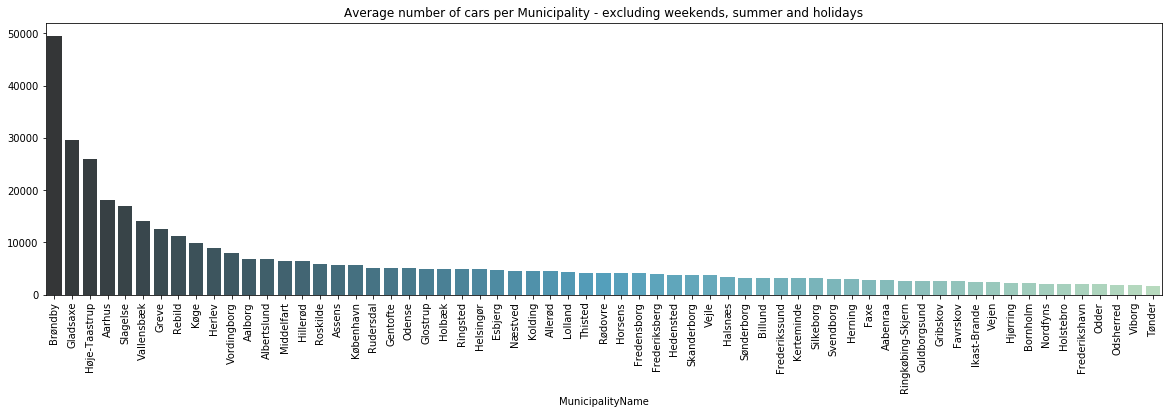

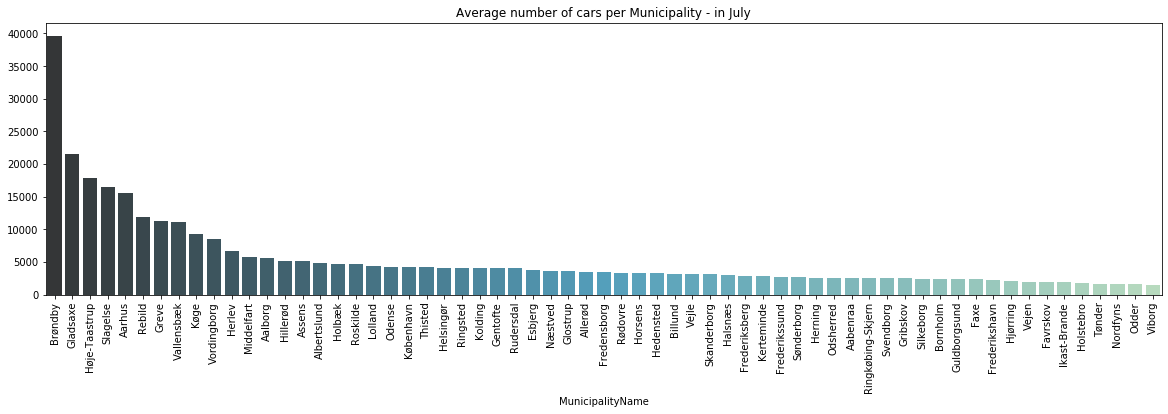

In [185]:
#Considering all days of the year (CHANGE TO MAP)
plt.figure(figsize=(20,5))
plt.title("Average number of cars per Municipality - considering all days of the year")
df = traffic_data.groupby('MunicipalityName').AverageDailyVehicles.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

#### Comparing the number of cars in July vs a working day
Some kommunes (values <1, on the left) experience a drop in traffic in July (business areas?), some (values >1, on the right) experience an increase in traffic in July (holiday destinations?).

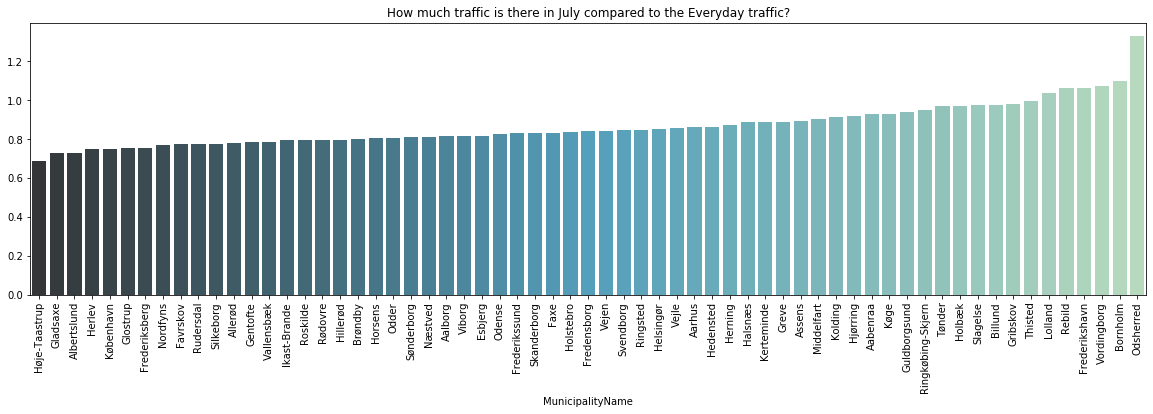

In [155]:
#Seasonal traffic (CHANGE TO MAP)
plt.figure(figsize=(20,5))
plt.title("How much traffic is there in July compared to the Everyday traffic?")
df = (traffic_data.groupby('MunicipalityName').DailyJulyTraffic.mean() / traffic_data.groupby('MunicipalityName').AverageWeekdayDailyVehicles.mean()).sort_values()
ax = sns.barplot(df.keys(), df.values, palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

#### Number of trucks

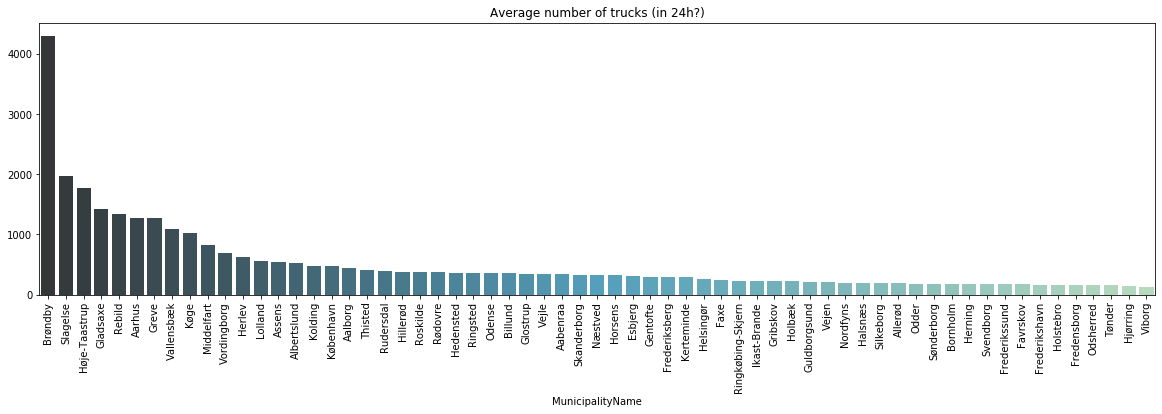

In [180]:
plt.figure(figsize=(20,5))
plt.title("Average number of trucks (in 24h?)")
df = traffic_data.groupby('MunicipalityName').AverageDailyTrucks.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

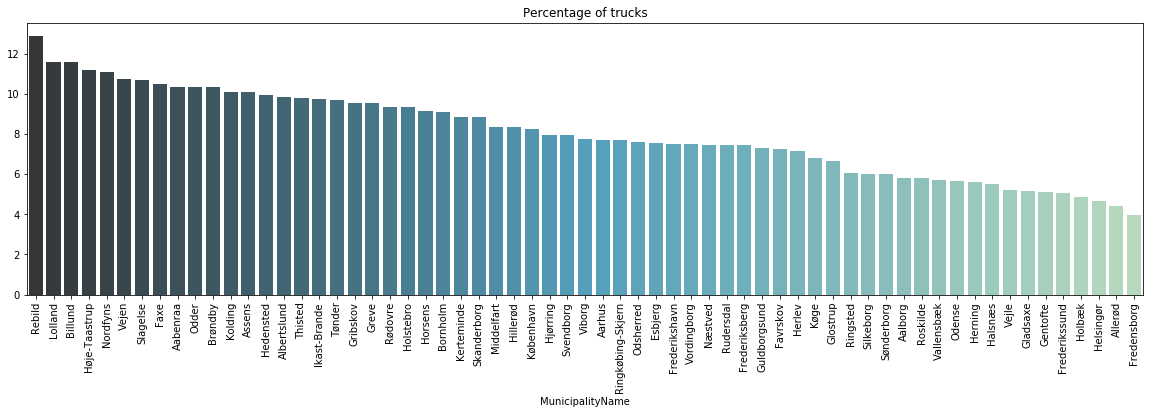

In [181]:
plt.figure(figsize=(20,5))
plt.title("Percentage of trucks")
df = traffic_data.groupby('MunicipalityName').PctOfTrucks.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

#### Traffic types 

I am not sure what BO-ARB means. "Bo og arbejde" = Live and work?

How is that different than BY (city?)


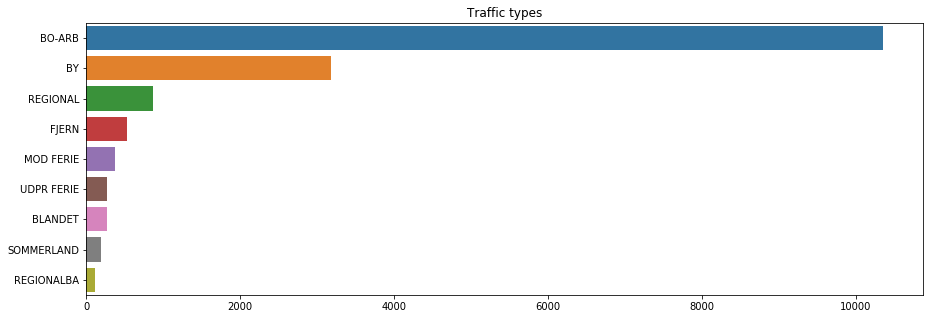

In [34]:
plt.figure(figsize=(15,5))
plt.title("Traffic types")
df = traffic_data.Traffictype.value_counts()
ax = sns.barplot(df.values, df.keys())
#plt.setp(ax.get_xticklabels(), rotation=90);

#### Speed

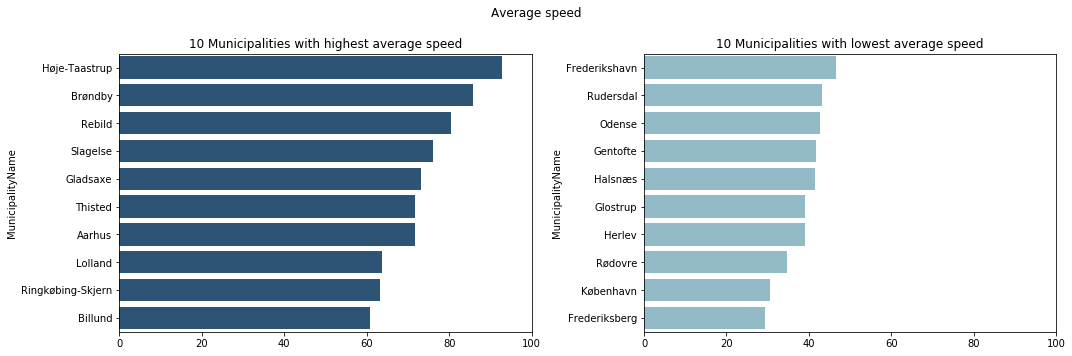

In [184]:
#Average Speed
plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("10 Municipalities with highest average speed")
df = traffic_data.groupby('MunicipalityName').AverageSpeed.mean().sort_values(ascending = False).head(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#215580")
ax.set(xlim=(0, 100))

plt.subplot(1, 2, 2)
plt.title("10 Municipalities with lowest average speed")
df = traffic_data.groupby('MunicipalityName').AverageSpeed.mean().sort_values(ascending = False).tail(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#88bdcf")
ax.set(xlim=(0, 100))

plt.suptitle('Average speed')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

#### Fast drivers

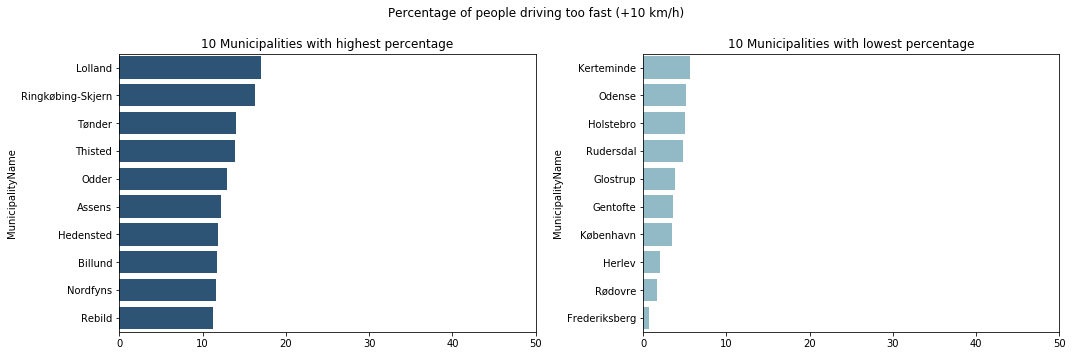

In [176]:
#Percentage of people driving too fast (+10 km/h)

plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("10 Municipalities with highest percentage")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit10.mean().sort_values(ascending = False).head(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#215580")
ax.set(xlim=(0, 50))

plt.subplot(1, 2, 2)
plt.title("10 Municipalities with lowest percentage")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit10.mean().sort_values(ascending = False).tail(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#88bdcf")
ax.set(xlim=(0, 50))

plt.suptitle('Percentage of people driving too fast (+10 km/h)')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

## 6. Addressing our research questions

### Which municipalities register the highest/lowest percentage of fast drivers?

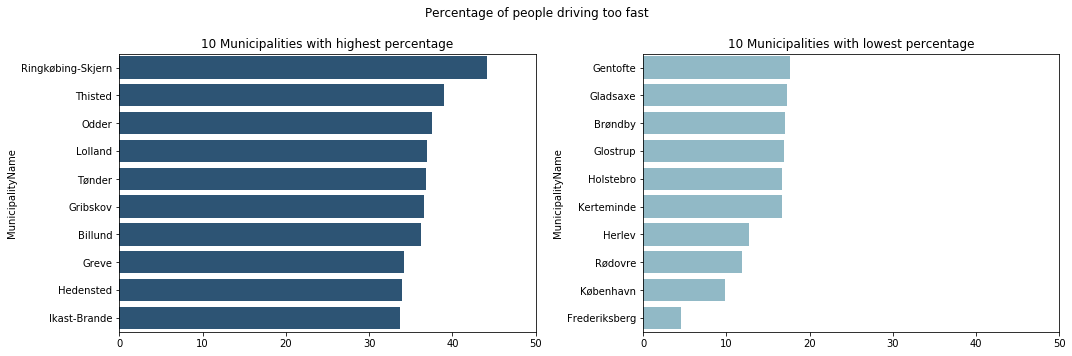

In [175]:
#Percentage of people driving too fast
plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("10 Municipalities with highest percentage")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit.mean().sort_values(ascending = False).head(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#215580")
ax.set(xlim=(0, 50))

plt.subplot(1, 2, 2)
plt.title("10 Municipalities with lowest percentage")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit.mean().sort_values(ascending = False).tail(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#88bdcf")
ax.set(xlim=(0, 50))

plt.suptitle('Percentage of people driving too fast')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

In [9]:
#MAP?
#Stacked barchart

### Which municipalities register the highest/lowest percentage of people (among the fast drivers) driving +20km/h above the limit?

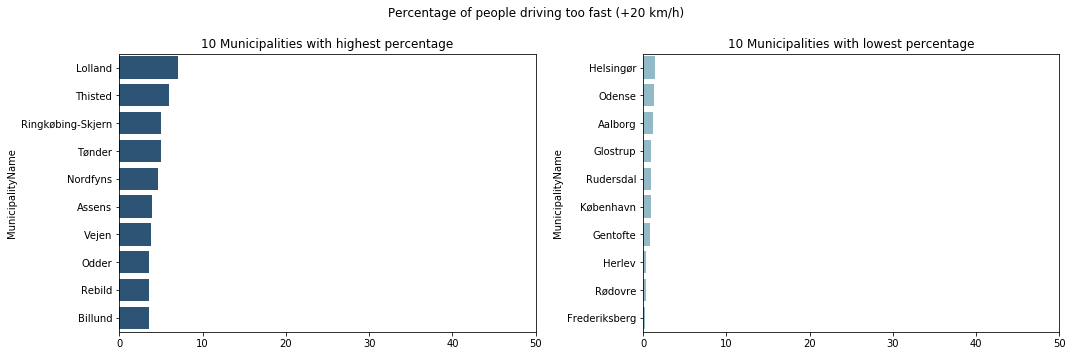

In [177]:
#Percentage of people driving too fast (+20 km/h)

plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("10 Municipalities with highest percentage")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit20.mean().sort_values(ascending = False).head(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#215580")
ax.set(xlim=(0, 50))

plt.subplot(1, 2, 2)
plt.title("10 Municipalities with lowest percentage")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit20.mean().sort_values(ascending = False).tail(10)
ax = sns.barplot(df.values, df.keys(), order = df.keys(), color="#88bdcf")
ax.set(xlim=(0, 50))

plt.suptitle('Percentage of people driving too fast (+20 km/h)')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

### Which roads register the highest/lowest percentage of fast drivers?

# Appendix

### Comparison among focus-municipalities

#### Selection of focus municipalities

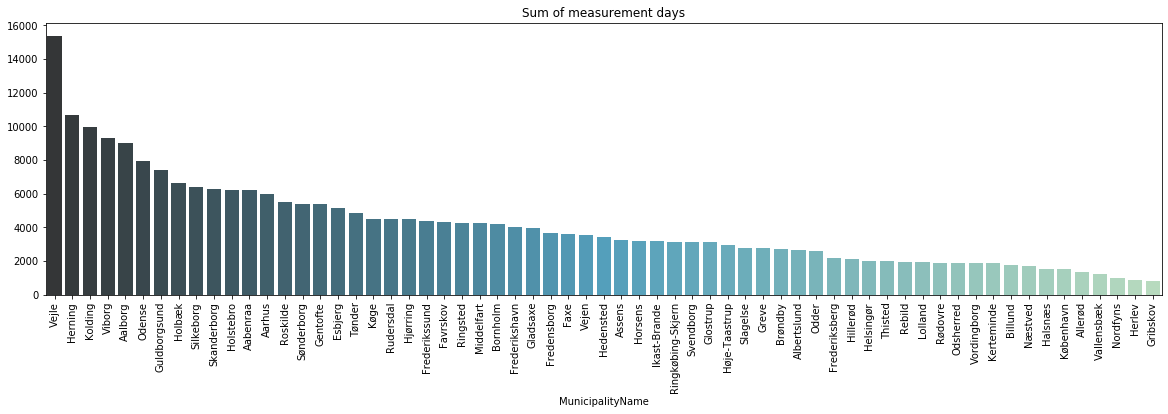

In [200]:
plt.figure(figsize=(20,5))
plt.title("Sum of measurement days")
df = traffic_data.groupby('MunicipalityName').CountedDays.sum().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

In [188]:
base = 3
traffic_data["CountedDaysLog"]= np.log(traffic_data.CountedDays+1) / np.log(base)

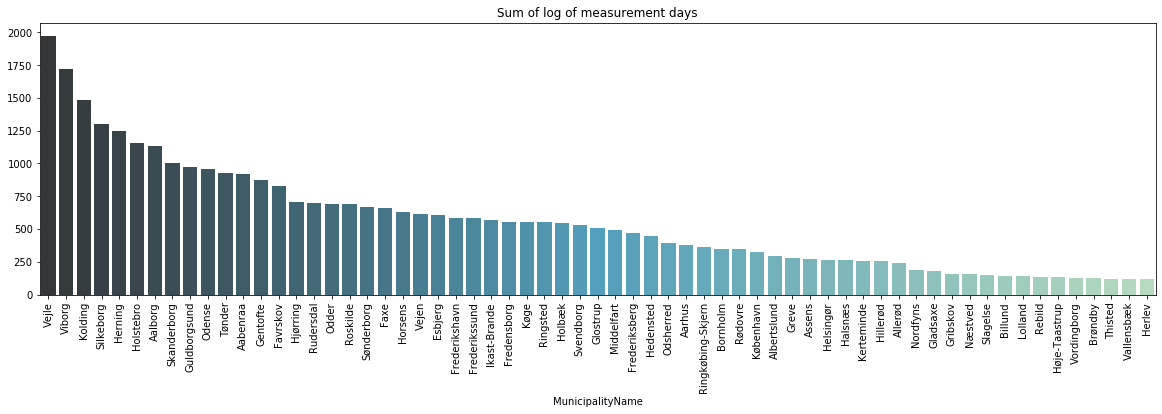

In [190]:
plt.figure(figsize=(20,5))
plt.title("Sum of log of measurement days")
df = traffic_data.groupby('MunicipalityName').CountedDaysLog.sum().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

In [191]:
focusmunicipalitiessize = 13
mostcountedlog = traffic_data.groupby('MunicipalityName').CountedDaysLog.sum().sort_values(ascending = False)
mostcounted = traffic_data.groupby('MunicipalityName').CountedDays.sum().sort_values(ascending = False)
newmun = (set(mostcountedlog[:focusmunicipalitiessize].index) - set(mostcounted[:focusmunicipalitiessize].index))
lostmun = (set(mostcounted[:focusmunicipalitiessize].index) - set(mostcountedlog[:focusmunicipalitiessize].index))

In [192]:
lostmun

{'Aarhus', 'Holbæk'}

In [193]:
newmun

{'Gentofte', 'Tønder'}

In [194]:
mostcountedlog

MunicipalityName
Vejle                1974.797059
Viborg               1718.130900
Kolding              1484.105499
Silkeborg            1302.713300
Herning              1249.691214
Holstebro            1157.460382
Aalborg              1134.139744
Skanderborg          1001.081865
Guldborgsund          970.121340
Odense                961.054904
Tønder                927.305483
Aabenraa              917.116842
Gentofte              875.488457
Favrskov              831.681024
Hjørring              705.431691
Rudersdal             699.155562
Odder                 691.087060
Roskilde              688.815466
Sønderborg            665.443457
Faxe                  661.804896
Horsens               628.435344
Vejen                 614.529666
Esbjerg               604.436335
Frederikshavn         584.621576
Frederikssund         581.148566
Ikast-Brande          568.749425
Fredensborg           556.169746
Køge                  554.826840
Ringsted              550.733190
Holbæk                545.

In [195]:
focusmunicipalities = mostcountedlog[:focusmunicipalitiessize].index
# Add Copenhagen because it is the capital
focusmunicipalities = list(focusmunicipalities)
focusmunicipalities.append("København")

In [196]:
focusmunicipalities

['Vejle',
 'Viborg',
 'Kolding',
 'Silkeborg',
 'Herning',
 'Holstebro',
 'Aalborg',
 'Skanderborg',
 'Guldborgsund',
 'Odense',
 'Tønder',
 'Aabenraa',
 'Gentofte',
 'København']

#### Plot variables against focus municipalities

In [197]:
data_to_focus = traffic_data[traffic_data.MunicipalityName.isin(focusmunicipalities)]
data_to_focus = data_to_focus[data_to_focus.Year > 2012]

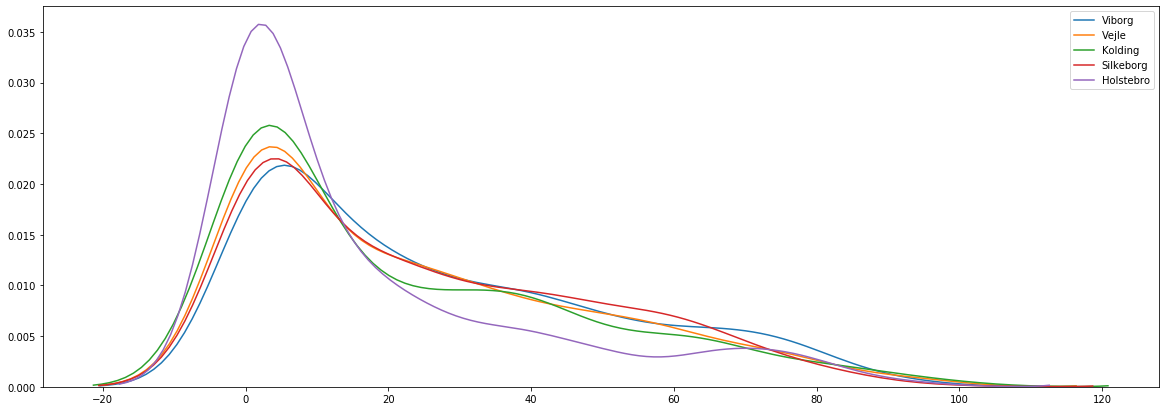

In [198]:
#Work in progress (to compare the distribution of more municipalities in only one chart)
plt.figure(figsize=(20,7))
for i in data_to_focus.MunicipalityName.value_counts().head(5).keys():
    sns.kdeplot(data_to_focus[data_to_focus.MunicipalityName == i]["PctOverSpeedLimit"], label= i )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A50112F668>,
      dtype=object)

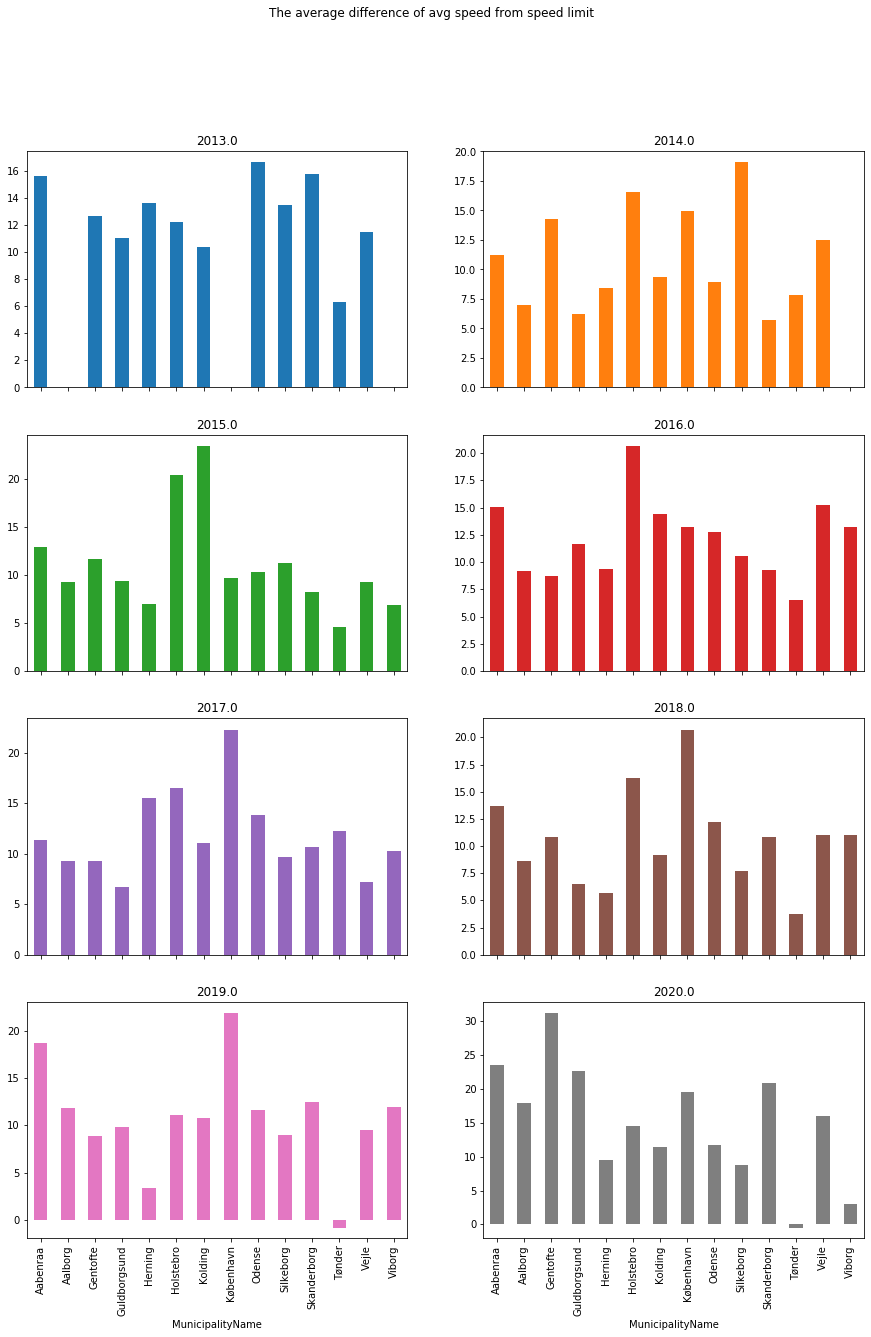

In [199]:
focus_counth =data_to_focus.groupby(['MunicipalityName', 'Year'])['AverageDifferenceSpeedLimitAvgSpeed'].mean()
focus_counth.unstack().plot.bar(subplots=True,layout=(4,2), figsize=(15,20), legend=False, title='The average difference of avg speed from speed limit')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A579594198>,
      dtype=object)

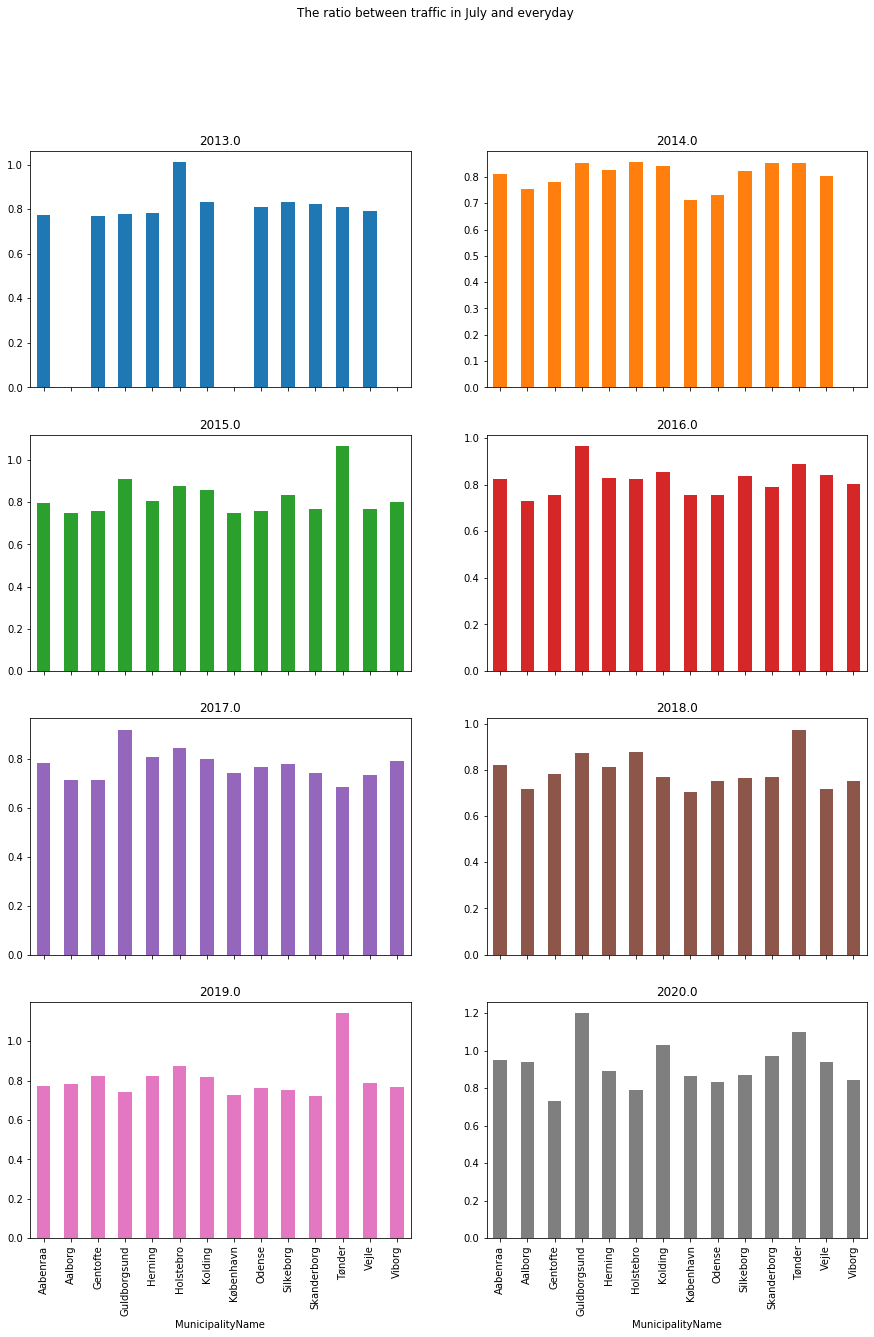

In [52]:
focus_counth =data_to_focus.groupby(['MunicipalityName', 'Year'])['JulyWeekdaysRatio'].mean()
focus_counth.unstack().plot.bar(subplots=True,layout=(4,2), figsize=(15,20), legend=False, title='The ratio between traffic in July and everyday')

Tonder and Koling seem to have an increase!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A57C375908>,
      dtype=object)

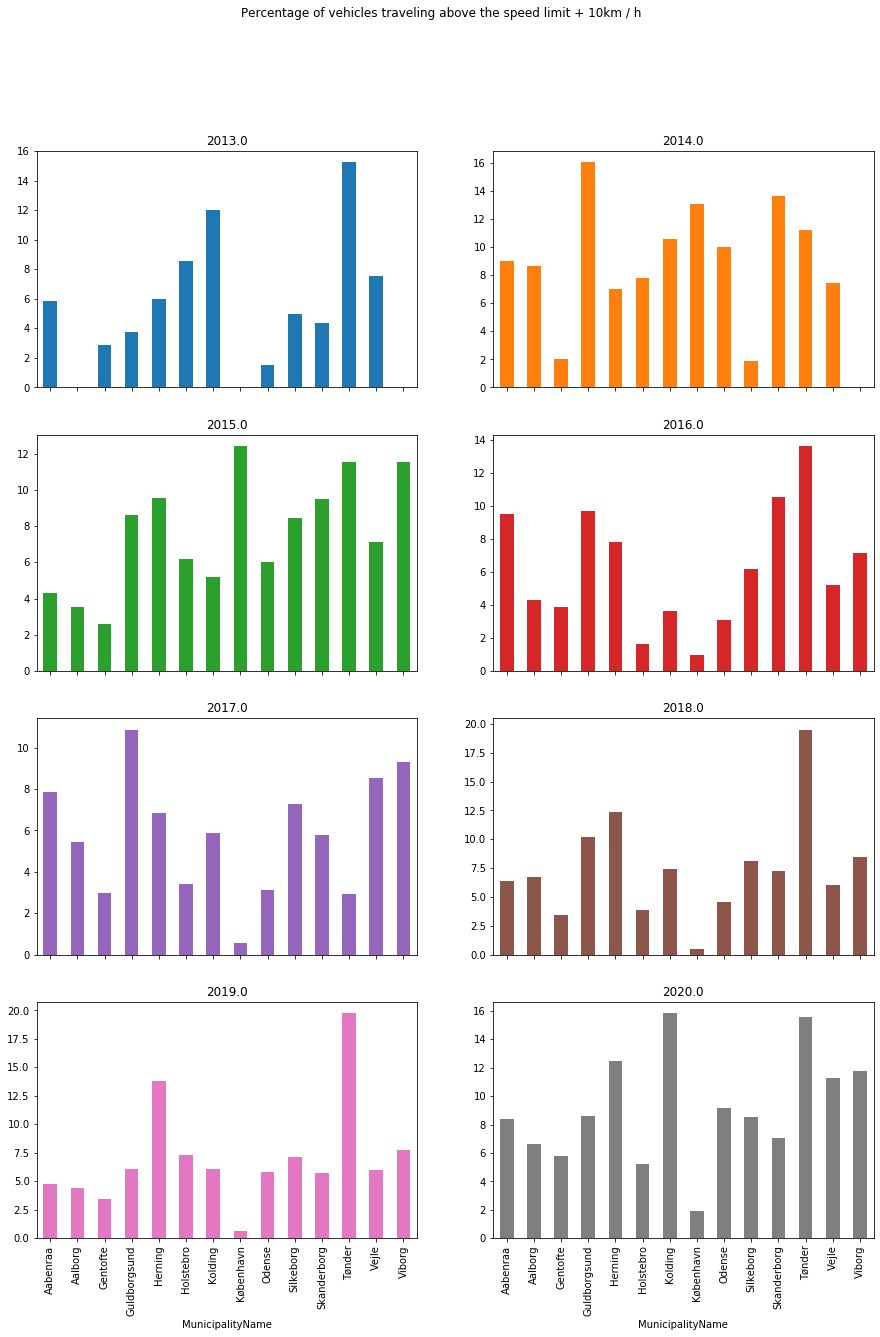

In [53]:
focus_counth =data_to_focus.groupby(['MunicipalityName', 'Year'])['PctOverSpeedLimit10'].mean()
focus_counth.unstack().plot.bar(subplots=True,layout=(4,2), figsize=(15,20), legend=False, title='Percentage of vehicles traveling above the speed limit + 10km / h')